## Long Short-Term Memory (LSTM)

LSTMs Long Short-Term Memory is a type of RNNs Recurrent Neural Network that can detain long-term dependencies in sequential data.

LSTMs are able to process and analyze sequential data, such as time series, text, and speech. 

They use a memory cell and gates to control the flow of information, allowing them to 
selectively retain or discard information as needed and thus avoid the vanishing gradient problem that plagues traditional RNNs.

LSTMs are widely used in various applications such as natural language processing, speech recognition, and time series forecasting.

## Types of Gates in LSTM

There are three types of gates in an LSTM: the input gate, the forget gate, and the output gate.

The input gate controls the flow of information into the memory cell. 

The forget gate controls the flow of information out of the memory cell. 

The output gate controls the flow of information out of the LSTM and into the output.

Three gates input gate, forget gate, and output gate are all implemented using sigmoid functions, which produce an output between 0 and 1. These gates are trained using a backpropagation algorithm through the network.

The input gate decides which information to store in the memory cell. It is trained to open when the input is important and close when it is not.

The forget gate decides which information to discard from the memory cell. It is trained to open when the information is no longer important and close when it is. 

The output gate is responsible for deciding which information to use for the output of the LSTM. It is trained to open when the information is important and close when it is not.

The gates in an LSTM are trained to open and close based on the input and the previous hidden state. This allows the LSTM to selectively retain or discard information, making it more effective at capturing long-term dependencies




## GRU (Gated Recurrent Unit) 

GRU (Gated Recurrent Unit) aims to solve the vanishing gradient problem which comes with a standard recurrent neural network. 
GRU can also be considered as a variation on the LSTM because both are designed similarly and, in some cases, produce equally excellent results.

The basic idea behind GRU is to use gating mechanisms to selectively update the hidden state of the network at each time step. 

The gating mechanisms are used to control the flow of information in and out of the network.

The GRU has two gating mechanisms, called the reset gate and the update gate.

The reset gate determines how much of the previous hidden state should be forgotten, while the update gate determines how much of the new input should be used to update the hidden state. The output of the GRU is calculated based on the updated hidden state.

Update Gate It determines how much of the past knowledge needs to be passed along into the future. It is analogous to the Output Gate in an LSTM recurrent unit.

Reset Gate It determines how much of the past knowledge to forget. It is analogous to the combination of the Input Gate and the Forget Gate in an LSTM recurrent unit.

Current Memory Gate It is often overlooked during a typical discussion on Gated Recurrent Unit Network.

 It is incorporated into the Reset Gate just like the Input Modulation Gate is a sub-part of the Input Gate and is used to introduce some non-linearity into the input and to also make the input Zero-mean.
 
  Another reason to make it a sub-part of the Reset gate is to reduce the effect that previous information has on the current information that is being passed into the future.

  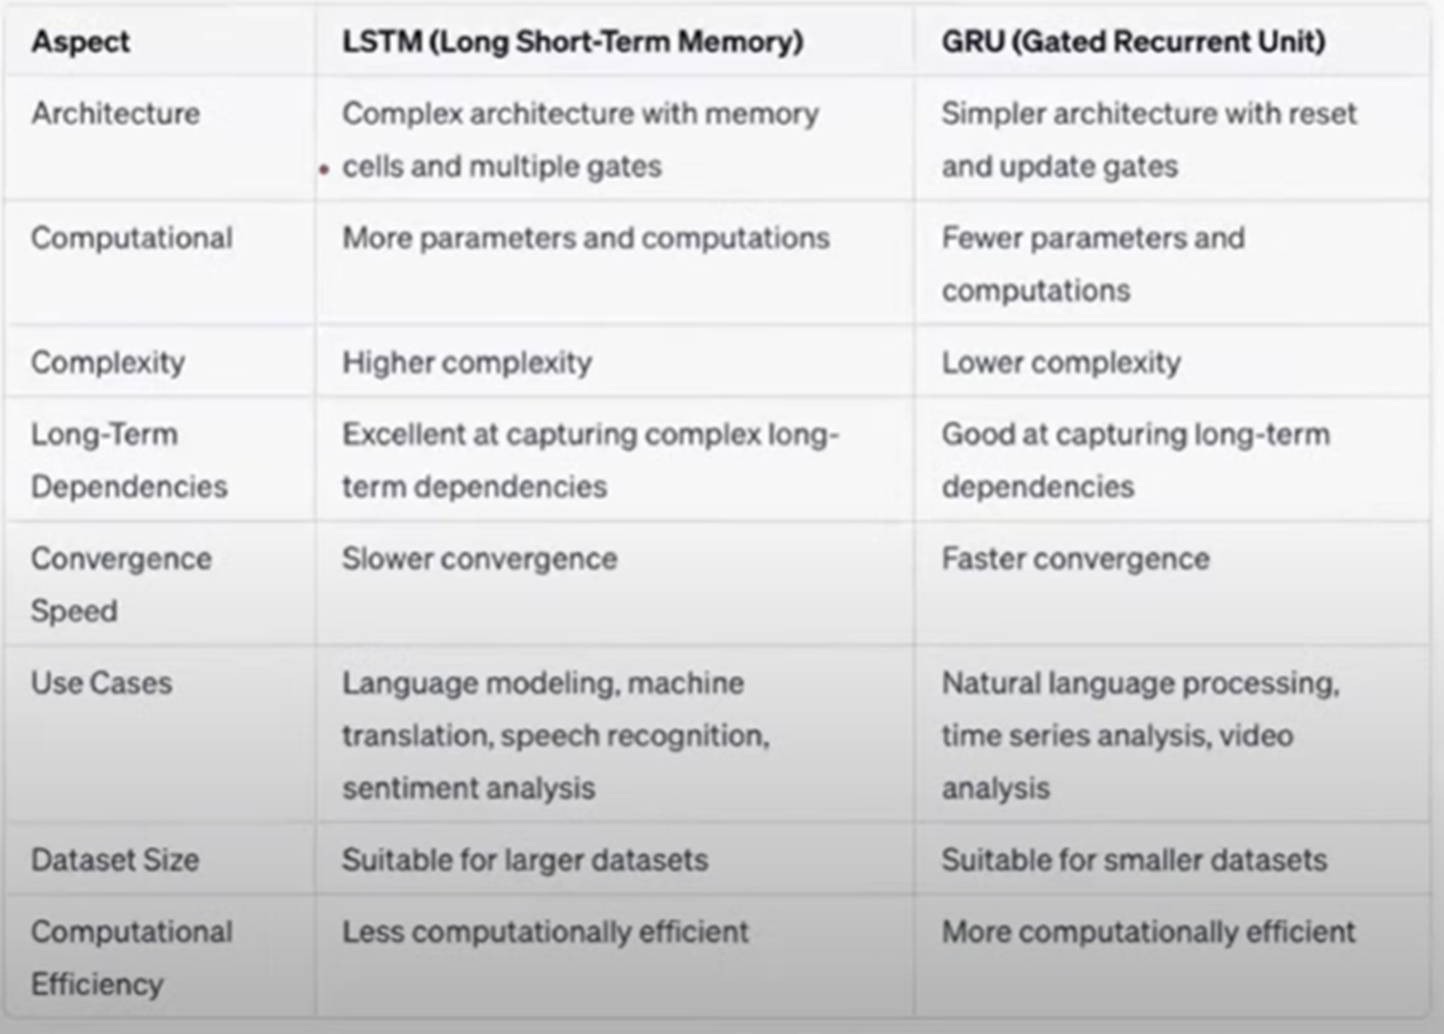



## LSTM (Long Short Term Memory) is a special kind of RNN, capable of learning long-term dependencies.

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))
df.head()

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6730
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6299 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4702 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3950 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3048 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2911 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2188
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1892 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1706
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1880 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1565
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1793 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1639 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1566 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1433
Epoch 16/100
4/4 ━━

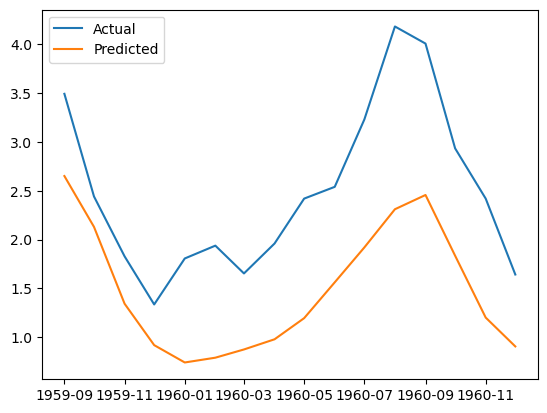

In [5]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential([
    LSTM(32, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

## let's build a simple RNN-based character-level text generator using a sample text. We'll use a sequence-to-sequence prediction approach to predict the next character in a sequence.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text))) # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars)) # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50): # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=1)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")

c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.9415
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9111
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9031
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8549 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8398
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7839 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7282 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6775 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.6751
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.7285 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.6937
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7700
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.7497
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7159 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.7818
Epoch 16/100
5/5 ━

## GRU (Gated Recurrent Unit) is a variation of LSTM. It has fewer parameters than LSTM, as it lacks an output gate.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU  # Note the change here
from tensorflow.keras.models import Sequential

In [2]:
# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))

In [3]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

In [4]:
# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [7]:
# Convert data to sequences
def to_sequence(data,seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)


In [8]:
seq_length = 12
X_train, y_train = to_sequence(train_data, seq_length)
X_test, y_test = to_sequence(test_data, seq_length)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Define the model using GRU
model = Sequential([
    GRU(32, input_shape=(seq_length, 1)),  # Note the change here
    Dense(1)
])

c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mse')

In [13]:
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2512
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2121
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2093 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2075
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1947 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1860 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1978
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1817 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1723
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1552 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1861
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1710
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1711  
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1624
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1523 
Epoch 16/100
4/4

In [14]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - loss: 0.6793
Test Loss: 0.6793043613433838


In [16]:
# Make predictions on test data
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


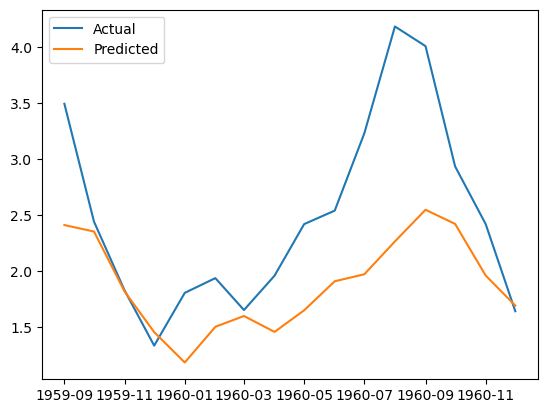

In [17]:
# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()